# OUR WORLD IN DATA- COVID19 PANDEMIC IN EAST AFRICA

## Introduction
The COVID-19 pandemic has left a lasting impact on global health systems, economies, and daily life. Understanding the patterns of infections, vaccinations, and mortality rates is crucial for assessing how different regions responded to the crisis. This analysis focuses on the Our World in Data (OWID) COVID-19 dataset, narrowing down to East Africa—specifically Kenya, Uganda, and Tanzania.
By examining key trends in vaccination rates, infection curves, andmortality ratess, we aim to highlightthe damage caused by the pandemict, accessibility to vaccines, and overall public health efforts. This regional approach offers valuable insights into how East Africa navigated the pandemic and the lingering challenges that remain. Through this study, we hope to uncover lessons that could strengthen future preparedness and resilience in handling similar global health crises

## Tools of Analysis
To effectively analyze the OWID COVID-19 dataset for East Afric onlya, I utilized several Python libraries to process, visualize, and interpret the data. Pandas played a crucial role in data manipulation, enabling efficient loading, cleaning, and structuring of the dataset for analysis. It provided the necessary functions to filter, aggregate, and reshape the data into a usable format.
For visualization, Matplotlib was employed to generate static plots, allowing for clear representation of trends over time. Its flexibility enabled customization of graphs, ensuring readability and interpretability.
To introduce interactivity in the analysis, Plotly Express was used to deve alop dynamic chrts, particularly useful for exploriworldwide total casesnds. With features such as zooming and hover interactions, it facilitated a more engaging exploration of multi-dimensional da
ta.
The combination of these tools ensured a comprehensive approach to examining COVID-19 trends in Kenya, Uganda, and Tanzania, providing valuable insights into regional pandecrisiegieBelow is the process of analysis and the insights arrived at:s.
.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('owid-covid-data.csv')

#Checking if I have the right columns
print(df.columns)

In [7]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [8]:
# Define key columns
key_columns = ["date", "location", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Check for missing columns
missing_cols = [col for col in key_columns if col not in df.columns]

if missing_cols:
    print(f"Warning: These columns are missing: {missing_cols}")
else:
    print("All key columns are present!")


All key columns are present!


In [45]:
# Filter for Kenya and making a copy
kenya_df = df[df["location"] == "Kenya"].copy()

# Drop rows with missing dates or critical values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]
kenya_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned data
print(kenya_df.head())


       iso_code continent location       date  total_cases  new_cases  \
158213      KEN    Africa    Kenya 2021-03-04     106801.0      331.0   
158219      KEN    Africa    Kenya 2021-03-10     109643.0      479.0   
158223      KEN    Africa    Kenya 2021-03-14     112805.0      870.0   
158226      KEN    Africa    Kenya 2021-03-17     115031.0     1064.0   
158233      KEN    Africa    Kenya 2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158213             288.714        1866.0         3.0                3.857   
158219             453.286        1886.0         7.0                3.286   
158223             634.714        1908.0         7.0                4.857   
158226             769.714        1925.0         7.0                5.571   
158233            1162.286        2048.0        25.0               17.571   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
158213  ...                  24

In [46]:
# Filter the DataFrame for the three East African countries
ea_countries = ['Kenya', 'Uganda', 'Tanzania']
df_ea = df[df['location'].isin(ea_countries)]

# Generate the statistical summary
summary = df_ea[['location', 'total_cases', 'total_deaths']].groupby('location').describe()

# Display the summary
print(summary)

         total_cases                                                          \
               count           mean            std  min        25%       50%   
location                                                                       
Kenya         1314.0  226467.716895  127669.629226  1.0  101387.75  290594.0   
Tanzania      1311.0   22879.624714   18476.013071  1.0     509.00   30564.0   
Uganda        1306.0  108636.919602   68507.571582  1.0   39952.25  147726.0   

                              total_deaths                                 \
                75%       max        count         mean          std  min   
location                                                                    
Kenya     341205.25  343999.0       1301.0  3989.208301  2138.602978  4.0   
Tanzania   41662.00   43078.0       1296.0   511.006944   386.059188  1.0   
Uganda    169638.00  171871.0       1184.0  2541.068412  1489.269756  1.0   

                                           
            

In [12]:
# Define key columns to check for missing values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Drop rows with missing values in any of these columns
kenya_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned dataset
print(kenya_df.head())


       iso_code continent location        date  total_cases  new_cases  \
158213      KEN    Africa    Kenya  2021-03-04     106801.0      331.0   
158219      KEN    Africa    Kenya  2021-03-10     109643.0      479.0   
158223      KEN    Africa    Kenya  2021-03-14     112805.0      870.0   
158226      KEN    Africa    Kenya  2021-03-17     115031.0     1064.0   
158233      KEN    Africa    Kenya  2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158213             288.714        1866.0         3.0                3.857   
158219             453.286        1886.0         7.0                3.286   
158223             634.714        1908.0         7.0                4.857   
158226             769.714        1925.0         7.0                5.571   
158233            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158213  ...

In [13]:
# Convert the 'date' column to datetime format
kenya_df["date"] = pd.to_datetime(kenya_df["date"])

# Display first few rows to confirm changes
print(kenya_df.head())
print(kenya_df.dtypes)  # Verify 'date' is now datetime


       iso_code continent location       date  total_cases  new_cases  \
158213      KEN    Africa    Kenya 2021-03-04     106801.0      331.0   
158219      KEN    Africa    Kenya 2021-03-10     109643.0      479.0   
158223      KEN    Africa    Kenya 2021-03-14     112805.0      870.0   
158226      KEN    Africa    Kenya 2021-03-17     115031.0     1064.0   
158233      KEN    Africa    Kenya 2021-03-24     123167.0     1127.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
158213             288.714        1866.0         3.0                3.857   
158219             453.286        1886.0         7.0                3.286   
158223             634.714        1908.0         7.0                4.857   
158226             769.714        1925.0         7.0                5.571   
158233            1162.286        2048.0        25.0               17.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
158213  ...      

In [14]:
kenya_df.interpolate(method="linear", inplace=True)

# TOTAL COVID19 CASES OVER TIME(KENYA, UGANDA AND TANZANIA)


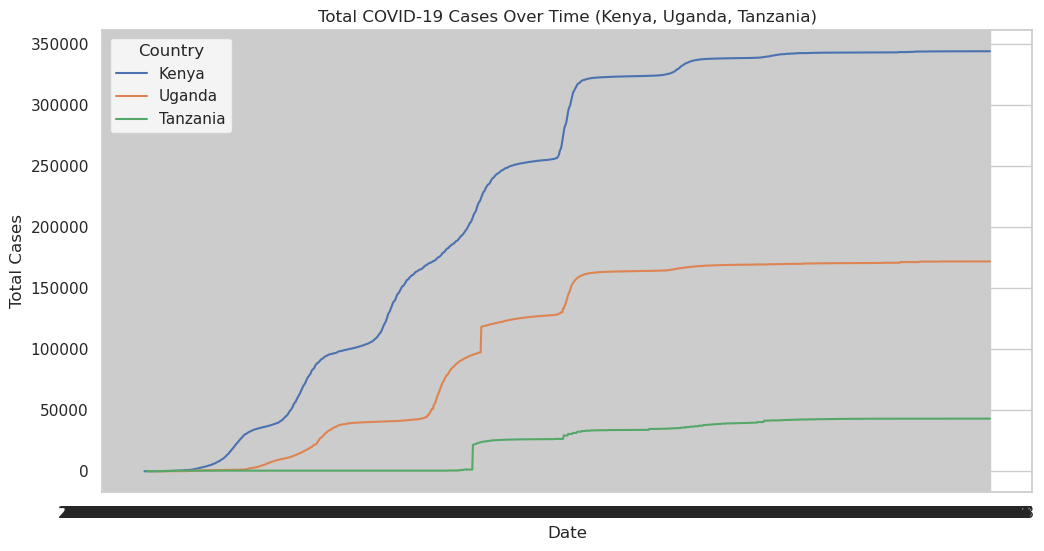

In [59]:
# Filter for Kenya, Uganda, and Tanzania
import matplotlib.pyplot as plt

countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)]

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_filtered[df_filtered["location"] == country]
    plt.plot(country_df["date"], country_df["total_cases"], label=country)

# Customize the plot
plt.title("Total COVID-19 Cases Over Time (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()


 ## Key Insights from the Graph (Total COVID-19 Cases Over Time)
1. Kenya has the highest total cases 
	The blue line (Kenya) shows a steep rise in cases,almost  surpassing 350,000 total cases.
	This suggests higher transmission rates or increased testing and reporting compared to the other two countries.
2.  Uganda follows with around 150,000 total cases 
    The orange line (Uganda) shows a consistent upward trend, but less steep than Kenya’s.
	Uganda’s cases remained below half of Kenya's total, which may indicate better containment measures or lower overall transmission.
3.  Tanzania records the lowest case count 
	The green line (Tanzania) has a very gradual increase, staying under 50,000 cases.
	This could be due to lower testing, different reporting standards, or effective containment strategies.
4.  All three countries show an upward trend in cases 
	No country exhibits a clear plateau—cases continued to rise.
	This suggests ongoing waves of infection and transmission, possibly impacted by variants, policies, or population behavior.
 Possible Interpretations
 Kenya’s higher case numbers → Likely due to increased testing, urban density, or transmission rates
 Uganda’s moderate numbers → Could indicate stronger interventions or fewer exposure hotspots
 Tanzania’s low reported cases → May be due to different testing/reporting methods or better containment


# TOTAL DEATHS OVER TIME (EAST AFRICA) 

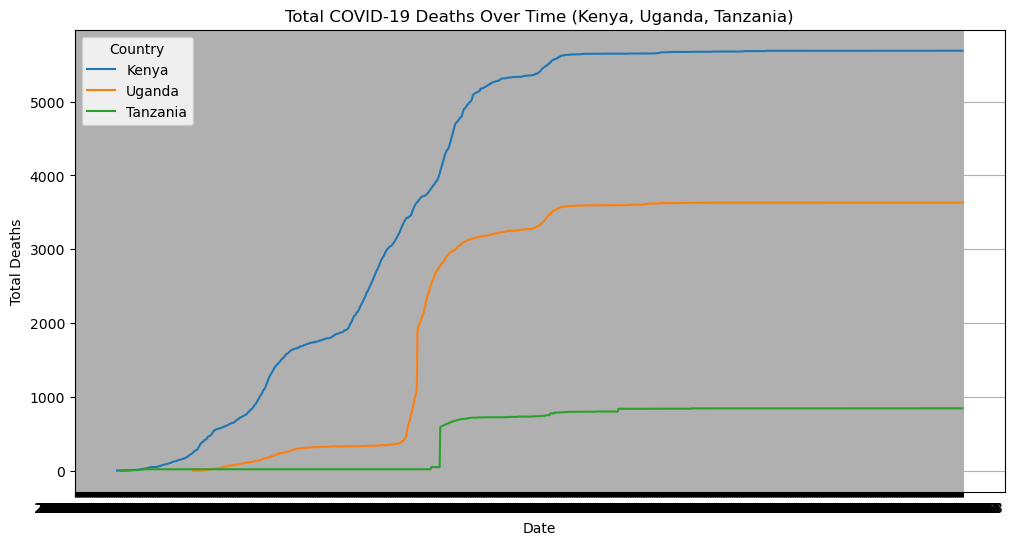

In [16]:
#plot total deaths over time
plt.figure(figsize = (12,6))
for country in countries:
    country_df = df_filtered[df_filtered['location'] == country]
    plt.plot(country_df["date"], country_df["total_deaths"], label=country)

# Customize the plot
plt.title("Total COVID-19 Deaths Over Time (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

## Key Insights from the Graph (Total COVID-19 Deaths Over Time)
1. Kenya has the highest total deaths 
	The blue line representing Kenya shows a steep rise in fatalities, surpassing 5,000 deaths.
	This suggests higher transmission rates, healthcare challenges, or broader reporting compared to the other countries.
2. Uganda follows with over 3,000 total deaths 
	The orange line (Uganda) shows a steady increase, reaching just above 3,000 deaths.
	This could indicate effective containment measures but significant losses during waves.
3. Tanzania reports fewer deaths ( 
	The green line (Tanzania) shows minimal growth in deaths, staying below 1,000.
	This might be due to different reporting methods, healthcare interventions, or early containment strategies.
4.  Sharp increases in Kenya and Uganda, gradual rise in Tanzania 
	Kenya and Uganda show notable spikes, which may align with surges in cases, overwhelmed healthcare, or new variants.
	Tanzania’s relatively stable trend indicates either fewer reported deaths or lower transmission rates.
 Possible Interpretations
 Kenya’s higher numbers → Likely due to high case counts, overwhelmed hospitals, or better tracking
 Uganda’s moderate deaths → Suggests stronger interventions but significant waves
 Tanzania’s low numbers → May reflect different data collection methods or containment effectiveness


# DAILY NEW COVID 19 CASES COMPARISON-EAST AFRICA 

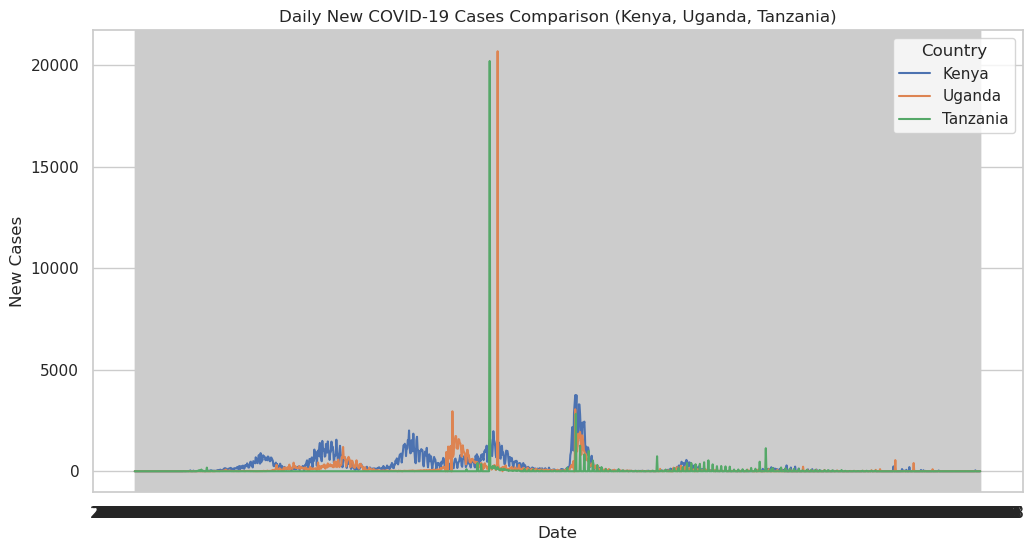

In [60]:

plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_filtered[df_filtered["location"] == country]
    plt.plot(country_df["date"], country_df["new_cases"], label=country)

# Customize the plot
plt.title("Daily New COVID-19 Cases Comparison (Kenya, Uganda, Tanzania)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()


## Daily New COVID-19 Cases insights
 Kenya (Blue Line)
- Kenya experienced multiple waves of COVID-19 infections, with several peaks occurring throughout the timeline.
- The highest peak reached around 5,000 new cases, suggesting periods of increased transmission, possibly linked to new variants or relaxed public health measures.
- The fluctuating nature of the curve indicates recurring outbreaks rather than a sustained spik
2. Uganda (Orange Line)
- Uganda recorded the highest single-day peak, reaching around 20,000 cases, which is significantly higher than the peaks observed in Kenya.
- The presence of such a sharp peak suggests either a period of rapid spread or a data backlog, where multiple cases were reported on the same day.
- Other smaller peaks are present, mirroring trends seen in neighboring counies.
3. Tanzania (Green Line)
- Tanzania's curve is relatively flat for most of the timeline, with low reported cases compared to Kenya and Uganda.
- There is one major peak, similar in scale to Uganda’s, which could indicate either a sudden outbreak or delayed reporting.
- The lack of additional fluctuations suggests limited testing or reporting, which could mean actual case numbers were unde

The sudden spikes in daily COVID-19 cases in Uganda and Tanzania were likely due to delayed reporting, mass testing campaigns, or policy shifts. Health authorities may have released backlogged test results, causing an artificial surge in numbers. Additionally, government interventions such as increased border controls or stricter health policies could have contributed to the spike. The emergence of new variants or outbreaks in specific communities may have further influenced the rise in cases. Tanzania’s initial skepticism toward strict containment measures could explain the earlier flat trend, while a later policy shift may have resulted in the observed spike. These factors highlight differences in pandemic response strategies across East Africa.
restimated.
lower exposure


# ANALYSING COVID PREVELANCE, WORLDWIDE AND EAST AFRICA

In [17]:
countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)].copy()  # This ensures df_filtered is defined

# Calculate death rate
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]
print(df_filtered.pivot_table(index="date", columns="location", values="death_rate"))

location       Kenya  Tanzania    Uganda
date                                    
2020-03-27  0.142857       NaN       NaN
2020-03-28  0.129032       NaN       NaN
2020-03-29  0.105263       NaN       NaN
2020-03-30  0.095238       NaN       NaN
2020-03-31  0.080000       NaN       NaN
...              ...       ...       ...
2023-10-14  0.016538  0.019639  0.021132
2023-10-15  0.016538  0.019639  0.021132
2023-10-16  0.016538  0.019639  0.021132
2023-10-17  0.016538  0.019639  0.021132
2023-10-18  0.016538  0.019639  0.021132

[1301 rows x 3 columns]


In [20]:
# Get all unique location names
unique_locations = df["location"].unique()
print(unique_locations)  # Displays ALL entries



['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' '

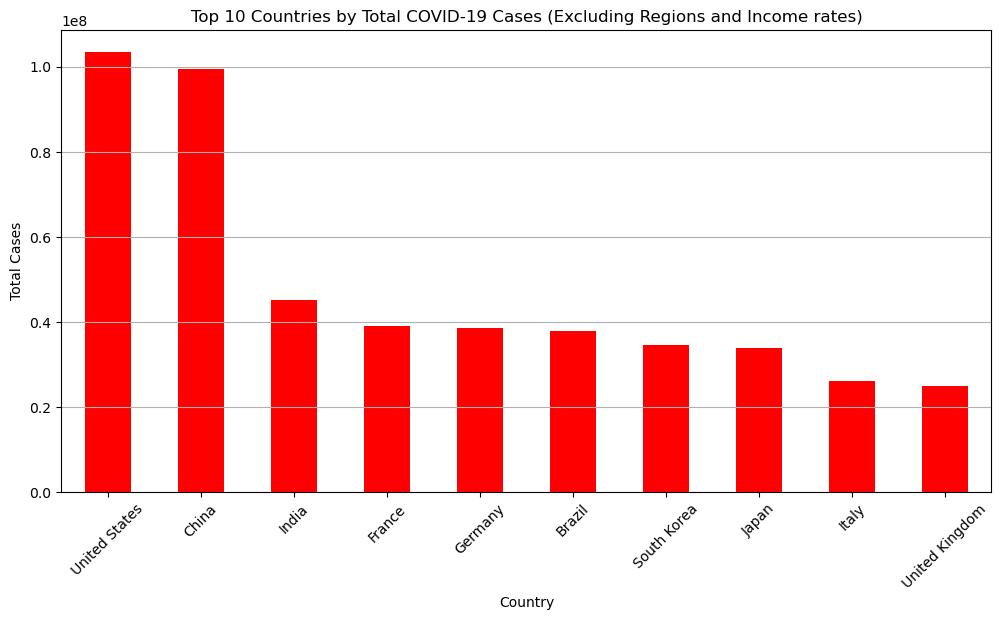

In [24]:
# Exclude non-country entities
regions_to_exclude = ["World", "European Union", "Asia", "Europe", "Africa", "North America", "South America",'High income','Upper middle income','Lower middle income']
df_filtered = df[~df["location"].isin(regions_to_exclude)]

# Get top 10 countries by total cases
top_countries = df_filtered.groupby("location")["total_cases"].max().nlargest(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind="bar", color="red")

# Customize plot
plt.title("Top 10 Countries by Total COVID-19 Cases (Excluding Regions and Income rates)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Show plot
plt.show()


 ## Top 10 Countries by Total COVID-19 Cases
1. United States and China lead in total cases 
	Both the United States and China report cases exceeding 100 million, significantly higher than other countries.
	This highlights high population densities, testing strategies, and sustained outbreaks.
2. India follows in third place 
	India has the third highest case count, reflecting its large population and major waves of infections.
	The country’s numbers indicate rapid transmission during peak periods.
3. European countries dominate mid-range case numbers 
	France, Germany, Italy, and the United Kingdom all rank among the top 10, showing Europe’s wide-scale impact.
	This could be linked to early outbreaks, strong testing measures, and variant-driven waves.
4.  Brazil, South Korea, and Japan show significant cases 
	Brazil saw major waves early in the pandemic, while Japan and South Korea experienced steady increases.
	Both Japan and South Korea had strict public health responses, yet the high numbers suggest extended outbreaks.
 Possible Interpretations
 United States & China’s high cases → Likely due to population size, exposure, and testing capacity
 India’s rapid case growth → Reflects high transmission during multiple waves
 Europe’s numbers → Suggests early exposure, variant spread, and strong reporting


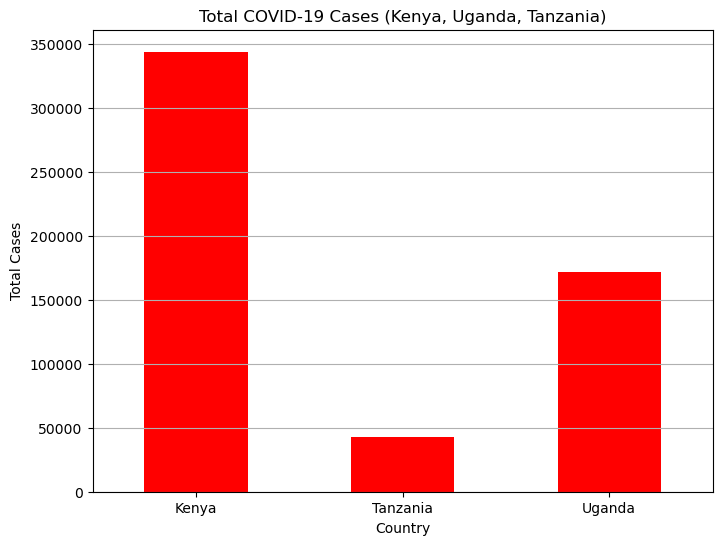

In [40]:
# Filter for Kenya, Uganda, and Tanzania
countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)].copy()

# Select latest available data
df_latest = df_filtered.sort_values("date").groupby("location").last()

# Extract total cases
total_cases = df_latest["total_cases"]

# Plot bar chart
plt.figure(figsize=(8, 6))
total_cases.plot(kind="bar", color=["red"])
# Customize plot
plt.title("Total COVID-19 Cases (Kenya, Uganda, Tanzania)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=0)
plt.grid(axis="y")

# Show plot
plt.show()


***Total COVID-19 Cases (Kenya, Uganda, Tanzania)*** provides a clear comparison of the total reported cases in these three East African countries.
Key Insights:
- Kenya has the highest number of total COVID-19 cases, reaching approximately 350,000 cases. This suggests more widespread transmission, higher testing rates, or better case reporting.
- Uganda follows with around 150,000 cases, showing a significant impact but lower than Kenya.
- Tanzania reports the lowest case count, roughly 50,000 cases. This could be due to limited testing, underreporting, or different COVID-19 management strategies.
Implications:
- The wide disparity in cases among the three countries highlights differences in testing strategies, public health policies, and data reporting.
- Kenya’s higher case count may indicate better tracking of infections, while Tanzania’s low numbers might reflect gaps in data collection or a different approach to the pandemic.
- Uganda’s position in the middle suggests moderate case detection and response measures, potentially influenced by vaccination rates and containment policies.


# CUMULATIVE COVID-19 VACCINATIONS OVER TIME-EAST AFRICA

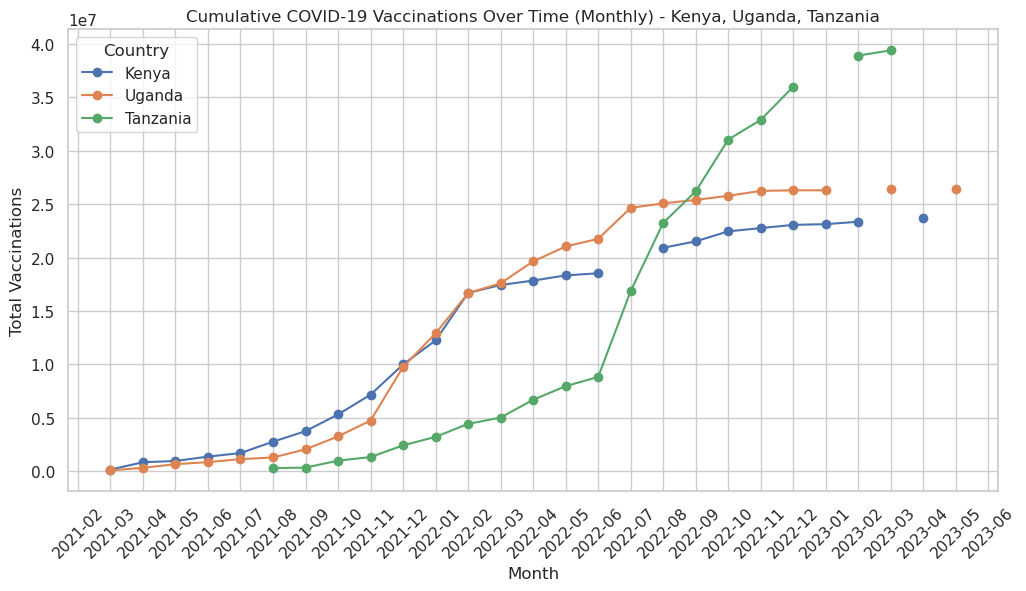

In [61]:
# Ensure 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")  

# Drop invalid dates
df = df.dropna(subset=["date"])

# Extract year-month for grouping
df["month"] = df["date"].dt.to_period("M")

# Filter for Kenya, Uganda, and Tanzania
countries = ["Kenya", "Uganda", "Tanzania"]
df_filtered = df[df["location"].isin(countries)].copy()

# Group by month and country, taking the max vaccinations per month
df_grouped = df_filtered.groupby(["month", "location"])["total_vaccinations"].max().reset_index()

# Convert period to string for easy plotting
df_grouped["month"] = df_grouped["month"].astype(str)

# Plot cumulative vaccinations over months
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df_grouped[df_grouped["location"] == country]
    plt.plot(country_df["month"], country_df["total_vaccinations"], marker="o", linestyle="-", label=country)

# Customize plot
plt.title("Cumulative COVID-19 Vaccinations Over Time (Monthly) - Kenya, Uganda, Tanzania")
plt.xlabel("Month")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True)

# Show plot
plt.show()


## Cumulative Vaccine Rollout in East Africa
- Kenya and Uganda started vaccination efforts at a similar pace,from February 2021 to April 2022, both countries saw steady increases. However, Ugandas vaccination rate plateaued after April 2022, while Kenya’s continued rising, albeit at a slower pace.
- Tanzania's campaign began later but gained momentum – While Kenya and Uganda started vaccinations around early 2021, Tanzania’s uptake increased significantly after June 2021, with rapid acceleration from June to October 2022.
- By mid-2023, Tanzania had the highest cumulative vaccinations, surpassing both Kenya and Uganda. This suggests a strong late-stage push in vaccination efforts or policies surrounding Covid awareness and vaccination.
- All three countries experienced periods of rapid vaccination growth followed by slower increases or plateaus, indicating shifts in vaccine availability, public health initiatives, or hesitancy.

# COVID-19 VACCINATION STATUS IN EAST AFRICA(PERCENTAGE AGAINST POPULATION)

In [42]:

# Filter for Kenya, Uganda, and Tanzania
countries = ['Kenya', 'Uganda', 'Tanzania']
df_ea = df[df['location'].isin(countries)]

# Drop rows with missing vaccination or population data
df_ea = df_ea.dropna(subset=['people_vaccinated', 'population'])

# Get the latest data per country (assuming 'date' column is in datetime format)
df_ea['date'] = pd.to_datetime(df_ea['date'])
latest_vax = df_ea.sort_values('date').groupby('location').last()

# Compute vaccinated individuals per population (as a percentage)
latest_vax['vaccinated_per_population'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100

# Select relevant columns for summary
result = latest_vax[['people_vaccinated', 'population', 'vaccinated_per_population']]
print(result)


          people_vaccinated  population  vaccinated_per_population
location                                                          
Kenya            14494372.0  54027484.0                  26.827775
Tanzania         34434933.0  65497752.0                  52.574221
Uganda           20033189.0  47249588.0                  42.398653


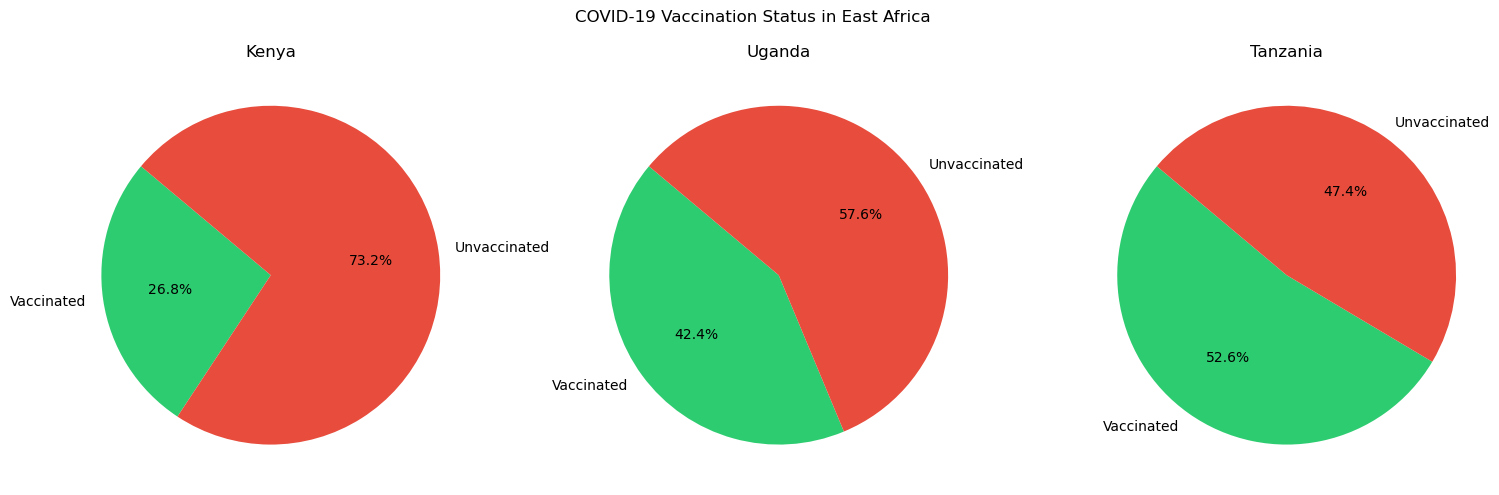

In [44]:
# Filter for the three countries
countries = ['Kenya', 'Uganda', 'Tanzania']
df_ea = df[df['location'].isin(countries)].dropna(subset=['people_vaccinated', 'population'])

# Ensure date column is datetime
df_ea['date'] = pd.to_datetime(df_ea['date'])

# Get the latest data per country
latest = df_ea.sort_values('date').groupby('location').last()

# Setup subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

colors = ['#2ecc71', '#e74c3c']  # Green for vaccinated, red for unvaccinated

for i, country in enumerate(countries):
    vaccinated = latest.loc[country, 'people_vaccinated']
    population = latest.loc[country, 'population']
    unvaccinated = population - vaccinated

    sizes = [vaccinated, unvaccinated]
    labels = ['Vaccinated', 'Unvaccinated']

    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
    axes[i].set_title(f'{country}')
    axes[i].axis('equal')  # Equal aspect ratio ensures pie is a circle

plt.suptitle('COVID-19 Vaccination Status in East Africa')
plt.tight_layout()
plt.show()


## Vaccination rollout in East Africa
1. Kenya has the highest percentage of unvaccinated individuals, with 73.2% of the population still unvaccinated. This suggests significant challenges in vaccine accessibility or hesitancy.
2. Uganda shows a more balanced ratio, with 57.6% of the population unvaccinated and 42.4% vaccinated. This indicates relatively better vaccine uptake compared to Kenya.
3. Tanzania has the highest vaccination rate among the three countries, with 52.6% of the population vaccinated and 47.4% unvaccinated. This could be attributed to stronger public health initiatives or vaccine acceptance. 
Conclusively, there are disparities in vaccination efforts within East Africa, with Kenya lagging behind and Tanzania leading in vaccine coverage.


# COVID-19 WORLD PREVELANCE
Below is a viz to show the prevelance of COVID19 worldwide.Hover and zoom to access total cases per country.

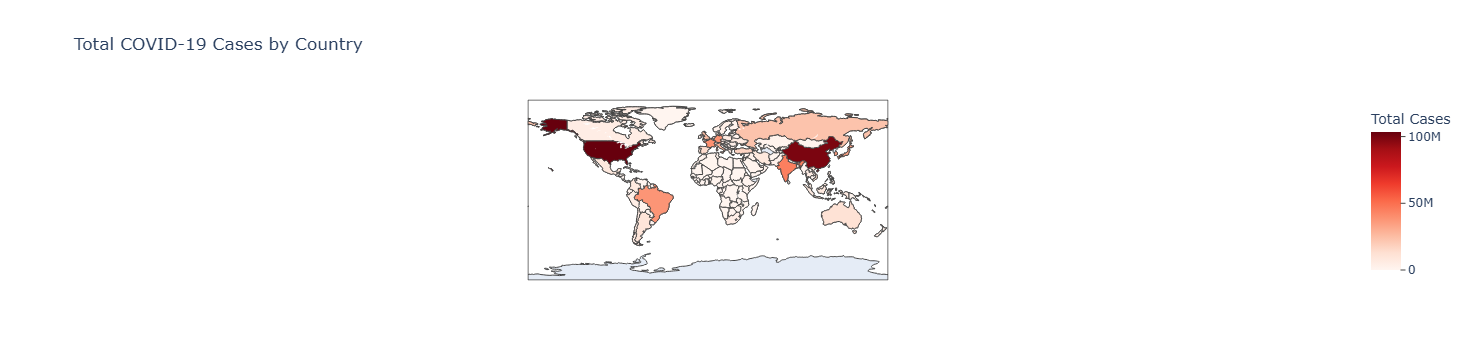

In [63]:

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# This entries are not countries
regions_to_exclude = [
    "World", "European Union", "Asia", "Europe", "Africa",
    "North America", "South America", "High income",
    "Upper middle income", "Lower middle income"
]

# Get latest data per location
latest_df = df.sort_values('date').groupby('location', as_index=False).last()


choropleth_data = latest_df[~latest_df['location'].isin(regions_to_exclude)]

# Keeping required columns and drop missing values
choropleth_data = choropleth_data[['iso_code', 'location', 'total_cases']].dropna(subset=['iso_code', 'total_cases'])


fig = px.choropleth(
    choropleth_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    range_color=[0, choropleth_data['total_cases'].max()],
    title="Total COVID-19 Cases by Country"
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Total Cases",
        ticks="outside"
    )
)

fig.show()




# Conclusion
The analysis of COVID-19 trends in Kenya, Uganda, and Tanzania highlights significant disparities in case numbers, vaccination uptake, and pandemic response strategies. While Kenya reported the highest total cases, Uganda experienced sharp spikes, and Tanzania showed delayed but sudden surges, likely due to policy shifts. These differences emphasize the critical role of proactive public health measures and transparent data reporting in pandemic managemen.
Moving forward, it is evident that swift action and strong preventive measures are essential to mitigate future outbreaks. Governments and health agencies must continue to strengthen healthcare systems, promote vaccination, and enhance data accuracy to improve crisis preparedness. The pandemic has shown that timely intervention, clear policies, and public awareness are crucial in protecting populations from severe health impacs.
This report underscores the importance of learning from past challenges and adapting strategies to ensure a more resilient response to future health cri


### Report by: Lyndah A Onyamasies.
